In [1]:
import os
import sys
import pandas as pd
import pickle
sys.path.append(os.getcwd())
sys.path.insert(0, os.path.join(os.getcwd(),os.pardir))
from recipe_gen.seq2seq_utils import FOLDER_PATH, DATA_FILES
from recipe_1m_analysis.utils import Vocabulary

In [4]:
file = "D:\\Documents\\THU\\food_recipe_gen\\KitcheNette_master\\results\\prediction_unknowns_kitchenette_pretrained.mdl.csv"
file = "D:\\Documents\\THU\\food_recipe_gen\\KitcheNette_master\\data\\kitchenette_pairing_scores.csv"
with open(file) as f:
    data = pd.read_csv(f)

In [5]:
data

,ingr1,ingr2,npmi,jaccard,pmi,pmi2,pmi3,ppmi,co-occurence,ingr1-count,ingr2-count,label,ingr1-type,ingr2-type,pairing-type,npmi_normalized
0,ginger_paste,garlic_paste,0.852068,0.387812,6.650003,-1.154540,-8.959082,0.449210,420,680,823,positive,Sauce/Powder/Dressing,Sauce/Powder/Dressing,same_pair,1.000000
1,washing_soda,borax,0.843008,0.221154,9.028028,-1.681275,-12.390578,0.311807,23,29,98,positive,ETC,Sauce/Powder/Dressing,diff_pair,0.993712
2,rice_chex,corn_chex,0.830721,0.305430,7.426251,-1.513271,-10.452794,0.350316,135,310,267,positive,Bakery/Dessert/Snack,Bakery/Dessert/Snack,same_pair,0.985184
3,cloth,paper,0.785075,0.195251,7.490192,-2.050540,-11.591272,0.241394,74,133,320,positive,ETC,ETC,same_pair,0.953504
4,malt_extract,irish_moss,0.777031,0.145455,9.142047,-2.623309,-14.388665,0.162295,8,42,21,positive,Essential Oil/Fat,Seafood,diff_pair,0.947921
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
356446,vanilla_extract,tomato,-0.486875,0.000100,-5.573212,-17.020114,-28.467016,0.000008,11,61073,48829,positive,Plant/Vegetable,Plant/Vegetable,same_pair,0.070712
356447,pepper,vanilla_extract,-0.488148,0.000161,-5.272135,-16.072410,-26.872685,0.000015,21,68984,61073,positive,Spice,Plant/Vegetable,diff_pair,0.069828
356448,vanilla_extract,parmesan_cheese,-0.517863,0.000060,-6.161992,-18.060880,-29.959767,0.000004,7,61073,55987,positive,Plant/Vegetable,Dairy,diff_pair,0.049205
356449,vanilla_extract,onion,-0.565844,0.000127,-5.872932,-16.251993,-26.631055,0.000013,32,61073,191691,positive,Plant/Vegetable,Plant/Vegetable,same_pair,0.015904


In [10]:
data["npmi"].mean()

0.050517400795478826

In [4]:
mean_score = data["prediction"].mean()
mean_score

0.22784972673890364

In [5]:
data[data["prediction"]>mean_score]

,ingr1,ingr2,prediction
89,macaroni,capsicum,0.234607
107,macaroni,sherbet,0.253330
129,macaroni,chuck,0.242534
140,macaroni,suet,0.235217
144,macaroni,elderberry,0.252609
...,...,...,...
260859,lovage,hop,0.494362
260860,lovage,kumquat,0.376326
260861,lovage,tamale,0.441316
260862,erythritol,ovaltine,0.477817


In [12]:
data.nlargest(40,"prediction")

KeyError: 'prediction'

In [13]:
with open(os.path.join(FOLDER_PATH,DATA_FILES[3]),'rb') as f:
    vocab_ingrs=pickle.load(f)

In [18]:
vocab_ingrs.idx2word[vocab_ingrs.word2idx["glue"]]

['glue']

In [13]:
ingr="tomato"

In [14]:
ingr_data=data[(data["ingr1"]==ingr) | (data["ingr2"]==ingr)]
ingr_data

,ingr1,ingr2,npmi,jaccard,pmi,pmi2,pmi3,ppmi,co-occurence,ingr1-count,ingr2-count,label,ingr1-type,ingr2-type,pairing-type,npmi_normalized
5274,lettuce,tomato,0.338561,0.048532,2.025895,-3.957946,-9.941787,0.064349,2594,7214,48829,positive,Plant/Vegetable,Plant/Vegetable,same_pair,0.643602
11677,avocado,tomato,0.276067,0.054732,1.588600,-4.165795,-9.920190,0.055715,3263,14052,48829,positive,Fruit,Plant/Vegetable,diff_pair,0.600229
13885,tomato,cucumber,0.262335,0.051543,1.523957,-4.285238,-10.094432,0.051288,3089,48829,14191,positive,Plant/Vegetable,Plant/Vegetable,same_pair,0.590698
14867,lettuce_leaves,tomato,0.256953,0.017154,1.817099,-5.254618,-12.326336,0.026194,874,2995,48829,positive,Plant/Vegetable,Plant/Vegetable,same_pair,0.586963
15312,tomato,bean_dip,0.254579,0.001003,2.533819,-7.419158,-17.372136,0.005843,49,48829,82,positive,Plant/Vegetable,Sauce/Powder/Dressing,diff_pair,0.585315
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
356252,cocoa,tomato,-0.327067,0.000108,-3.942152,-15.995190,-28.048228,0.000015,6,6520,48829,positive,Plant/Vegetable,Plant/Vegetable,same_pair,0.181626
356333,baking_soda,tomato,-0.348157,0.001106,-3.156281,-12.221955,-21.287629,0.000209,119,58931,48829,positive,Sauce/Powder/Dressing,Plant/Vegetable,diff_pair,0.166988
356410,confectioners'_sugar,tomato,-0.411834,0.000090,-4.963853,-17.016891,-29.069929,0.000008,6,18112,48829,positive,Sauce/Powder/Dressing,Plant/Vegetable,diff_pair,0.122794
356413,powdered_sugar,tomato,-0.414688,0.000146,-4.746891,-16.193794,-27.640696,0.000013,11,26729,48829,positive,Sauce/Powder/Dressing,Plant/Vegetable,diff_pair,0.120813


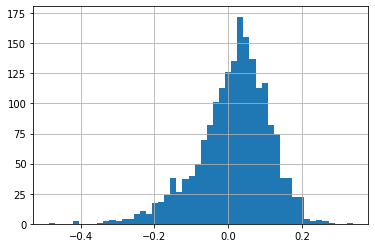

In [16]:
ingr_data.hist(bins=50)

In [17]:
ingr_data.nlargest(40,"prediction")

,ingr1,ingr2,npmi,jaccard,pmi,pmi2,pmi3,ppmi,co-occurence,ingr1-count,ingr2-count,label,ingr1-type,ingr2-type,pairing-type,npmi_normalized
5274,lettuce,tomato,0.338561,0.048532,2.025895,-3.957946,-9.941787,0.064349,2594,7214,48829,positive,Plant/Vegetable,Plant/Vegetable,same_pair,0.643602
11677,avocado,tomato,0.276067,0.054732,1.588600,-4.165795,-9.920190,0.055715,3263,14052,48829,positive,Fruit,Plant/Vegetable,diff_pair,0.600229
13885,tomato,cucumber,0.262335,0.051543,1.523957,-4.285238,-10.094432,0.051288,3089,48829,14191,positive,Plant/Vegetable,Plant/Vegetable,same_pair,0.590698
14867,lettuce_leaves,tomato,0.256953,0.017154,1.817099,-5.254618,-12.326336,0.026194,874,2995,48829,positive,Plant/Vegetable,Plant/Vegetable,same_pair,0.586963
15312,tomato,bean_dip,0.254579,0.001003,2.533819,-7.419158,-17.372136,0.005843,49,48829,82,positive,Plant/Vegetable,Sauce/Powder/Dressing,diff_pair,0.585315
16384,tomato,turmeric_powder,0.249220,0.010214,1.896658,-5.713729,-13.324116,0.019054,510,48829,1614,positive,Plant/Vegetable,Sauce/Powder/Dressing,diff_pair,0.581595
18256,tomato,coriander_powder,0.240751,0.007871,1.896173,-5.979917,-13.856007,0.015844,391,48829,1238,positive,Plant/Vegetable,Sauce/Powder/Dressing,diff_pair,0.575717
20375,iceberg_lettuce,tomato,0.232128,0.011412,1.738741,-5.751686,-13.242114,0.018560,575,2131,48829,positive,Plant/Vegetable,Plant/Vegetable,same_pair,0.569733
21558,tomato,eggplant,0.227748,0.027009,1.492620,-5.061202,-11.615025,0.029952,1467,48829,6954,positive,Plant/Vegetable,Plant/Vegetable,same_pair,0.566693
23174,tomato,garam_masala_powder,0.221894,0.002649,1.991996,-6.985267,-15.962530,0.007893,130,48829,374,positive,Plant/Vegetable,Sauce/Powder/Dressing,diff_pair,0.562630
